## Importación de librerías

In [1]:
# Data processing
# -----------------------------------------------------------------------
import pandas as pd

# Visualization  
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and evaluation  
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Regression models  
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

# Metrics  
# -----------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Carga de datos

In [2]:
df = pd.read_csv('../Data/df_clasificacion.csv', index_col=0)
df.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado,horario_estudio_preferido_missing,estilo_aprendizaje_missing,tiene_tutor_No,tiene_tutor_Sí
0,0.269009,0.833002,0.445949,0.636364,1.000000,0.463128,0.50,0.777143,1.0,0.0,0.0,0.0,1.0
1,0.726082,0.793121,0.102807,0.000000,0.000000,0.463128,0.75,0.600000,1.0,0.0,1.0,1.0,0.0
2,0.862624,0.682795,0.625874,0.636364,1.000000,0.561063,0.50,0.714286,1.0,0.0,0.0,1.0,0.0
3,0.741118,0.785623,0.765471,0.454545,1.000000,1.000000,1.00,0.688571,1.0,1.0,0.0,1.0,0.0
4,0.517917,0.431749,0.445307,0.272727,0.825975,1.000000,0.00,0.514286,1.0,1.0,0.0,1.0,0.0


In [3]:
# despues del primer entrenamiento del modelo, eliminamos la colunna nota_final por tener una correlacion muy alta con la columna aprobada
df.drop(columns=['nota_final'], inplace=True)

## Separación del conjunto de datos

In [4]:
# Variable objetivo
tv = 'aprobado'  # Variable objetivo a predecir

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [5]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 11)
Tamaño del conjunto de prueba: (200, 11)


## Entrenamiento del modelo

In [6]:
# Crear una instancia de LogisticRegression
model = LogisticRegression(penalty='l2', C=1.0,  max_iter=200)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [7]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

In [8]:
# Obtener probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

## Validación del modelo

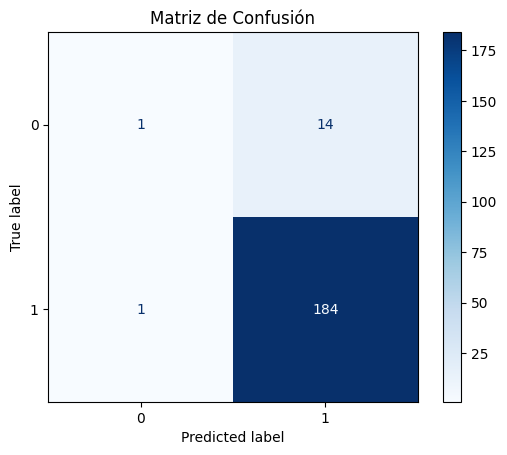

In [9]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

## Métricas

In [10]:
# Calcular predicciones para el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Obtener las probabilidades de predicción
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

In [11]:
# Cálculo de métricas
metrics = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred),
        "Recall": recall_score(y_train, y_train_pred),
        "F1-score": f1_score(y_train, y_train_pred),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1-score": f1_score(y_test, y_test_pred),
    },
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T

In [12]:
df_metrics.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.90,0.90,1.00,0.94
test,0.92,0.93,0.99,0.96


In [13]:
# Cálculo de métricas con desbalanceo
metrics_weighted = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1-score": f1_score(y_train, y_train_pred, average="weighted"),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_test_pred, average="weighted"),
    },
}

# Mostrar métricas en un DataFrame
df_metrics_weighted = pd.DataFrame(metrics_weighted).T


In [14]:
df_metrics_weighted.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.90,0.89,0.90,0.85
test,0.92,0.90,0.92,0.90


## Importancia de características

In [15]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False, key=abs)  # Ordenar por magnitud

In [16]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
0,nota_anterior,2.757918
1,tasa_asistencia,1.516317
4,nivel_dificultad,0.879818
5,horario_estudio_preferido,0.611228
7,horario_estudio_preferido_missing,0.522753
10,tiene_tutor_Sí,0.404025
9,tiene_tutor_No,-0.401788
6,estilo_aprendizaje,-0.372252
2,horas_sueno,0.334064
3,edad,-0.221748


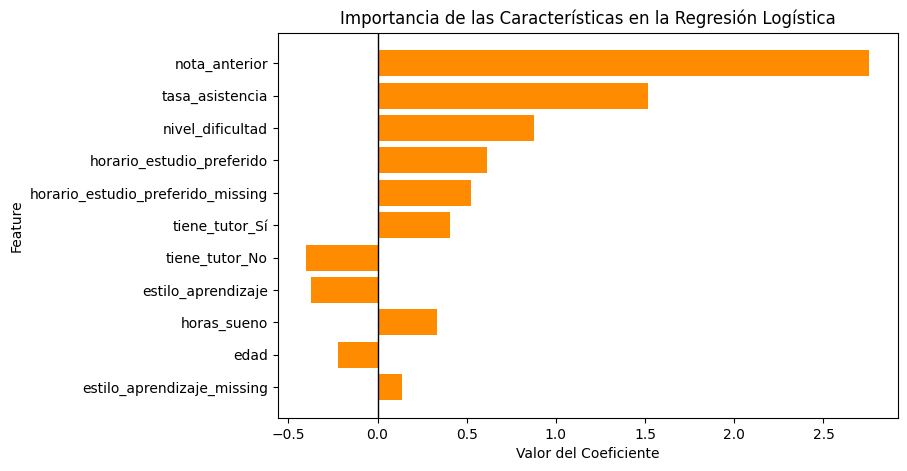

In [17]:
# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='darkorange')
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Feature")
plt.title("Importancia de las Características en la Regresión Logística")
plt.axvline(0, color='black', linewidth=1)  # Línea en el 0 para referencia
plt.gca().invert_yaxis()  # Invertir eje para que la más importante esté arriba
plt.show()

## Entrenamiento final

In [18]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
model_final = LogisticRegression(penalty='l2', C=1.0,  max_iter=200,  n_jobs=-1)
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "../Modelo/modelo_clasificacion.pkl")

['../Modelo/modelo_clasificacion.pkl']

---

In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir modelos de regresión logística con regularización
models = {
    "Logistic (L2 - Ridge)": LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    "Logistic (L1 - Lasso)": LogisticRegression(penalty='l1', C=0.1, solver='liblinear'),
    "Logistic (ElasticNet)": LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga'),
}

# Inicializar diccionario para métricas
metrics_results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas ponderadas
    metrics_results[name] = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train Precision (Weighted)": precision_score(y_train, y_train_pred, average='weighted'),
        "Train Recall (Weighted)": recall_score(y_train, y_train_pred, average='weighted'),
        "Train F1 (Weighted)": f1_score(y_train, y_train_pred, average='weighted'),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision (Weighted)": precision_score(y_test, y_test_pred, average='weighted'),
        "Test Recall (Weighted)": recall_score(y_test, y_test_pred, average='weighted'),
        "Test F1 (Weighted)": f1_score(y_test, y_test_pred, average='weighted'),
    }

# Convertir métricas a DataFrame
df_metrics = pd.DataFrame(metrics_results).T

/opt/homebrew/Caskroom/miniforge/base/envs/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniforge/base/envs/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/Caskroom/miniforge/base/envs/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [20]:
df_metrics.round(2)

,Train Accuracy,Train Precision (Weighted),Train Recall (Weighted),Train F1 (Weighted),Test Accuracy,Test Precision (Weighted),Test Recall (Weighted),Test F1 (Weighted)
Logistic (L2 - Ridge),0.90,0.91,0.90,0.85,0.93,0.93,0.93,0.90
Logistic (L1 - Lasso),0.89,0.79,0.89,0.84,0.92,0.86,0.92,0.89
Logistic (ElasticNet),0.89,0.79,0.89,0.84,0.92,0.86,0.92,0.89
